# Lab 14: PixelNet-like CNN for CIFAR-10 Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
# 2. Build PixelNet-like CNN model
def build_pixelnet():
    model = models.Sequential([
        layers.Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:

# 3. Train the model
model = build_pixelnet()
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=4,
    batch_size=64,
    verbose=1
)

# 4. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 1071s 2s/step - accuracy: 0.2683 - loss: 2.5078 - val_accuracy: 0.3158 - val_loss: 1.9203
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 1108s 2s/step - accuracy: 0.4767 - loss: 1.4431 - val_accuracy: 0.4834 - val_loss: 1.4169
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 1120s 2s/step - accuracy: 0.5997 - loss: 1.1522 - val_accuracy: 0.6477 - val_loss: 1.0472
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 1053s 2s/step - accuracy: 0.6756 - loss: 0.9469 - val_accuracy: 0.7011 - val_loss: 0.8811

Test Accuracy: 0.7009


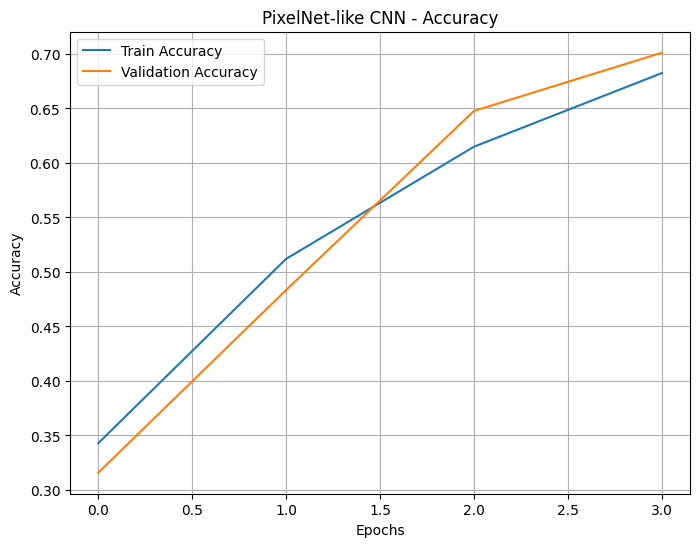

In [5]:
# 5. Plot accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("PixelNet-like CNN - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

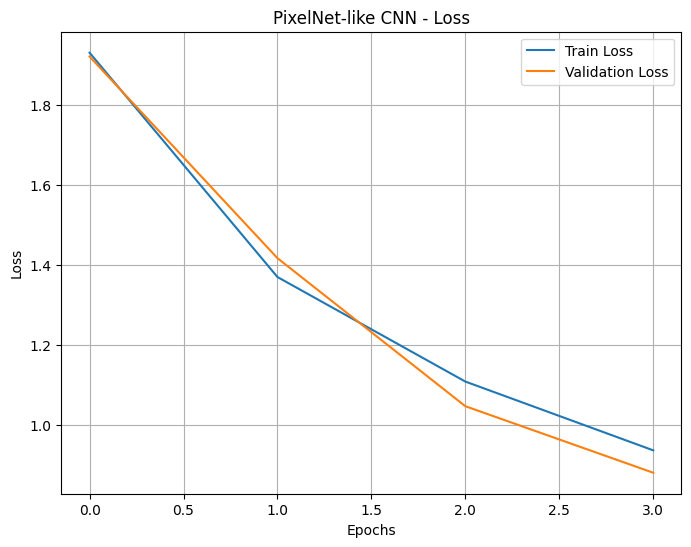

In [6]:
# 6. Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("PixelNet-like CNN - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 7. Predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()




313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step


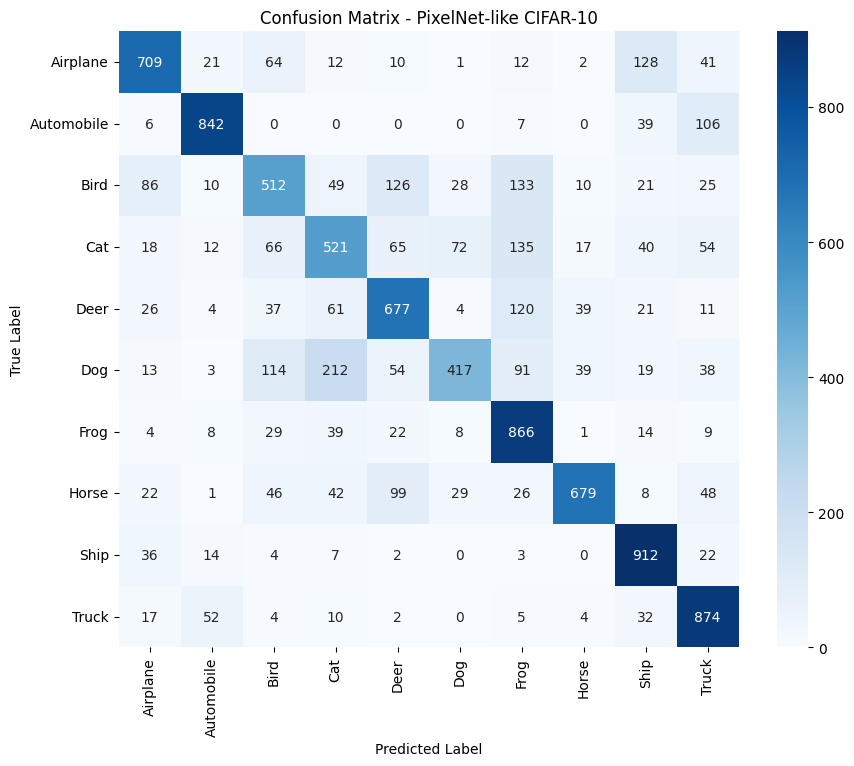

In [8]:
# 8. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - PixelNet-like CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:

# 9. Classification Report
print("\nClassification Report - PixelNet-like CIFAR-10")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report - PixelNet-like CIFAR-10
              precision    recall  f1-score   support

    Airplane       0.76      0.71      0.73      1000
  Automobile       0.87      0.84      0.86      1000
        Bird       0.58      0.51      0.55      1000
         Cat       0.55      0.52      0.53      1000
        Deer       0.64      0.68      0.66      1000
         Dog       0.75      0.42      0.53      1000
        Frog       0.62      0.87      0.72      1000
       Horse       0.86      0.68      0.76      1000
        Ship       0.74      0.91      0.82      1000
       Truck       0.71      0.87      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000

